# CodeClause Data Science Intern Project-1 : Gold Price Prediction


### About the DataSet:

 

Link to the Dataset used - <a herf= https://www.kaggle.com/datasets/altruistdelhite04/gold-price-data> Gold Price DataSet <br>
    
<p>The dataset contains historical prices of gold and other important financial information. I began by analyzing the data to gain insights, then worked on refining and organizing the data to prepare it for modeling. Next, I trained and compared different machine learning models to predict gold prices. To evaluate the performance of these models, I used metrics like mean squared error and root mean squared error.</p>

### Table of Contents
1) Importing the Dependencies <br>
2) Data Collection and Data Processing <br>
3) Exploratory Data Analysis <br>
4) Splitting Data into the Features and Target <br>
5) Splitting Data into Training data and Test Data <br>
6) Model Training: Random Forest Regressor <br>
7) Model Evaluation <br>
8) Compare the Actual Values and Predicted values <br>


## Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

## Data Collection and Preprocessing

In [2]:
# loading the csv data into pandas dataframe
df=pd.read_csv('gld_price_data.csv')

## Inspecting the Dataset

In [3]:
#printing the dataset
df

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


<b>Data set columns</b>

Date - mm/dd/yyyy <br>
SPX - is a free-float weighted measurement stock market index of the 500 largest companies listed on stock exchanges in the United States.<br>
GLD - Gold Price<br>
USO - United States Oil Fund<br>
SLV - Silver Price<br>
EUR/USD - currency pair quotation of the Euro against the US

In [4]:
#first five rows in the dataframe
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
#last five rows in the dataframe
df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
#any 10 rows in the dataframe
df.sample(10)

,Date,SPX,GLD,USO,SLV,EUR/USD
645,12/17/2010,1243.910034,134.199997,37.810001,28.510000,1.323995
1879,7/11/2016,2137.159912,129.289993,10.650000,19.299999,1.105803
2051,4/11/2017,2353.780029,121.190002,11.170000,17.309999,1.061132
1727,11/9/2015,2078.580078,104.400002,14.080000,13.890000,1.073341
1933,10/13/2016,2132.550049,120.029999,11.490000,16.610001,1.104972
1665,7/22/2015,2114.149902,104.800003,16.340000,14.140000,1.092705
821,10/6/2011,1164.969971,160.490005,31.980000,31.200001,1.342895
21,2/1/2008,1395.420044,89.349998,70.470001,16.618999,1.479991
1723,11/3/2015,2109.790039,106.980003,15.280000,14.580000,1.101601
1696,9/16/2015,1995.310059,107.309998,15.360000,14.220000,1.129203


## Information about DataSet

In [7]:
#Number of rows and columns in dataframe
df.shape

(2290, 6)

The info() method prints information about the DataFrame. The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


The describe() method returns description of the data in the DataFrame. If the DataFrame contains numerical data, the description contains these information for each column: count - The number of not-empty values. mean - The average (mean) value.

In [9]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


## Handling with Missing data

In [10]:
# checking the number of missing values
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

There are no missing values in the dataframe.So, we don't need to no anything

# EXPLORATORY DATA ANALYSIS

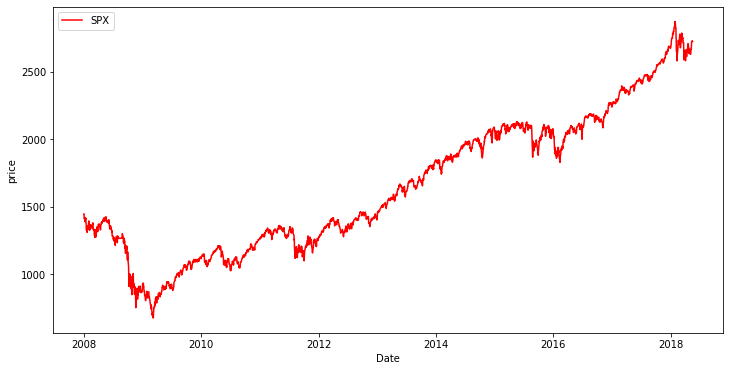

In [11]:
data_set1 = df.copy()
data_set1.Date = pd.to_datetime(data_set1['Date'])
data_set1.set_index('Date')
plt.figure(figsize=(12,6))
plt.plot(data_set1['Date'].values,data_set1['SPX'],color='red',label='SPX')
plt.xlabel('Date')
plt.ylabel('price')
plt.legend()
plt.show()

The graph represents the price movements of the 'SPX' (presumably the S&P 500 index) over time. The x-axis represents dates, and the y-axis represents the price. 

### Correlation

<strong>Data Correlation:</strong> Is a way to understand the relationship between multiple variables and attributes in your dataset. Using Correlation, you can get some insights such as:

<li>One or multiple attributes depend on another attribute or a cause for another attribute.</li>
<li>One or multiple attributes are associated with other attributes.</li>

<strong>Positive Correlation:</strong> means that if feature A increases then feature B also increases or if feature A decreases then feature B also decreases. Both features move in tandem and they have a linear relationship.

<strong>Negative Correlation:</strong> means that if feature A increases then feature B decreases and vice versa.

<strong>No Correlation:</strong> No relationship between those two attributes.

In [12]:
correlation = df.corr()

<AxesSubplot:>

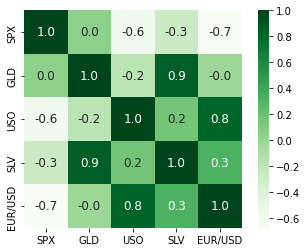

In [13]:
sns.heatmap(correlation ,cbar='True',square = 'True',annot = True ,annot_kws={'size':12},cmap='Greens',fmt='.1F')

In [14]:
correlation['GLD']

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

<AxesSubplot:xlabel='GLD', ylabel='Density'>

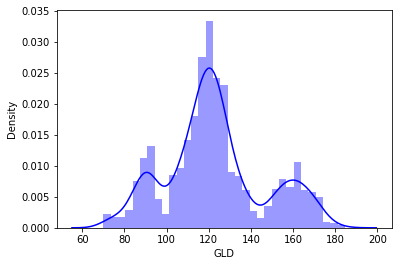

In [15]:
# checking the distribution of the GLD Price
sns.distplot(df['GLD'],color='blue')

From Distribution Plot, I conclude that most of the values lie in the range of 120, and less values lie in 90 and 180 & bump in 100 and near 140.

## Splitting Data into the Features and Target 

In [16]:
X = df.drop(['Date','GLD'],axis=1)
Y = df['GLD']

In [17]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [18]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


### Splitting Data into Training data and Test Data

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

## Model Creation and Training: Random Forest Regressor

<b>Model Training:</b> Random Forest Regressor

<li>Random forest is an ensemble of decision trees. This is to say that many trees, constructed in a certain “random” way form a Random Forest.</li>
<li>Each tree is created from a different sample of rows and at each node, a different sample of features is selected for splitting.</li>
<li>Each of the trees makes its own individual prediction.</li>
<li>These predictions are then averaged to produce a single result</li>

In [20]:
regressor = RandomForestRegressor(n_estimators=100)

# Training the model
# .fit function used to fit our data to this regressive model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Now, The Random Forest Regression Model is trained, and I use this trained model to make  predictions.


## Model Evaluation


In [21]:
# Prediction on test data
test_data_prediction = regressor.predict(X_test)
test_data_prediction 

array([122.35429918, 130.38000266, 127.7318003 ,  96.66589768,
       118.53270069, 114.31869917, 124.77540135, 117.69869907,
       108.02840152,  98.25199992,  95.75529949, 167.76399863,
       150.34980058, 116.50880029, 170.65850164,  84.98339921,
       123.16869869, 108.72619726, 113.76259984, 131.42880305,
       124.19009917, 113.70540112, 116.09840076, 108.87840009,
       108.62320131, 125.68589926, 118.45879983, 112.49549924,
       113.47260127, 125.45899938, 146.15770217,  89.4960999 ,
       168.00859941, 113.83959901, 108.36500135, 120.12980157,
       142.06949816, 161.29180094, 174.06449775, 153.22290165,
       119.29270107, 112.90980091, 121.32819945, 113.70449931,
       121.97103825, 108.00960087,  88.47759906, 114.47749915,
       129.65490274, 118.10900098, 104.10740071, 129.70120284,
       107.17949856, 160.40530406, 131.60900026, 118.20959971,
       147.04740059, 135.09690207,  95.55580145, 124.82890127,
       115.66669881,  86.40130058, 104.28449898, 113.83

In [22]:
# # R-squared is a statistical measure of how close the data are to the fitted regression line.
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9900800451101153


### Compare the Actual Values and Predicted Values in a Plot

In [23]:
Y_test = list(Y_test)

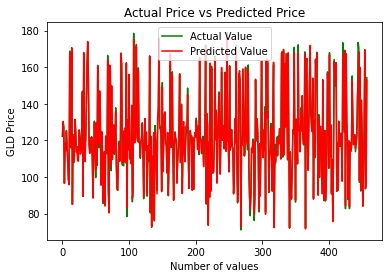

In [24]:
plt.plot(Y_test, color='green', label = 'Actual Value') # Actual Values
plt.plot(test_data_prediction, color='red', label='Predicted Value') #Predicted Values
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

<li>R scored error: 0.99, which is very good.</li>
<li>As I compare actual values and predicted values are very close to each other.</li>


A machine learning model with an R-squared score of 0.99 indicates that the model's predictions explain 99% of the variability observed in the data. This high R-squared score suggests that the model is performing very well and is able to accurately capture the relationships between the input variables and the target variable. The model's predictions are likely to be highly accurate and reliable.